In [1]:
# Dataset: mtcars.csv
# link: https://drive.google.com/drive/folders/1YujA_GjKigwSJXbRJTkO1l2p1gMmm8ai

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Datasets/mtcars.csv')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
# disp, hp, wt (input multidimensional)
x = df[['disp', 'hp', 'wt']]

# mpg (output should be one dimensional)
y = df['mpg']
x.shape, y.shape

((32, 3), (32,))

In [5]:
x.corrwith(y)

disp   -0.847551
hp     -0.776168
wt     -0.867659
dtype: float64

In [6]:
# Build the Model
from sklearn.linear_model import LinearRegression

In [7]:
regression = LinearRegression()

In [8]:
regression.fit(x, y)


LinearRegression()

In [9]:
regression.coef_

array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00])

In [10]:
regression.score(x,y)

0.8268361424946447

In [11]:
# Using List
disp = 221
hp = 102
wt = 2.91
inp = [[disp, hp, wt]]
regression.predict(inp)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.65986648])

In [12]:
# Using List
disp = [221]
hp = [102]
wt = [2.91]
inp = [disp, hp, wt]


In [15]:
# Using DataFrame
disp = 221
hp = 102
wt = 2.91
inp_df = pd.DataFrame({
    'disp':[disp],
    'hp':[hp],
    'wt':[wt]
})
regression.predict(inp_df)

array([22.65986648])

In [ ]:
#using formula
b1 = regression.coef_[0]
b2 = regression.coef_[1]
b3 = regression.coef_[2]
c = regression.intercept_

In [ ]:
predict = b1*disp + b2*hp + b3*wt + c
predict

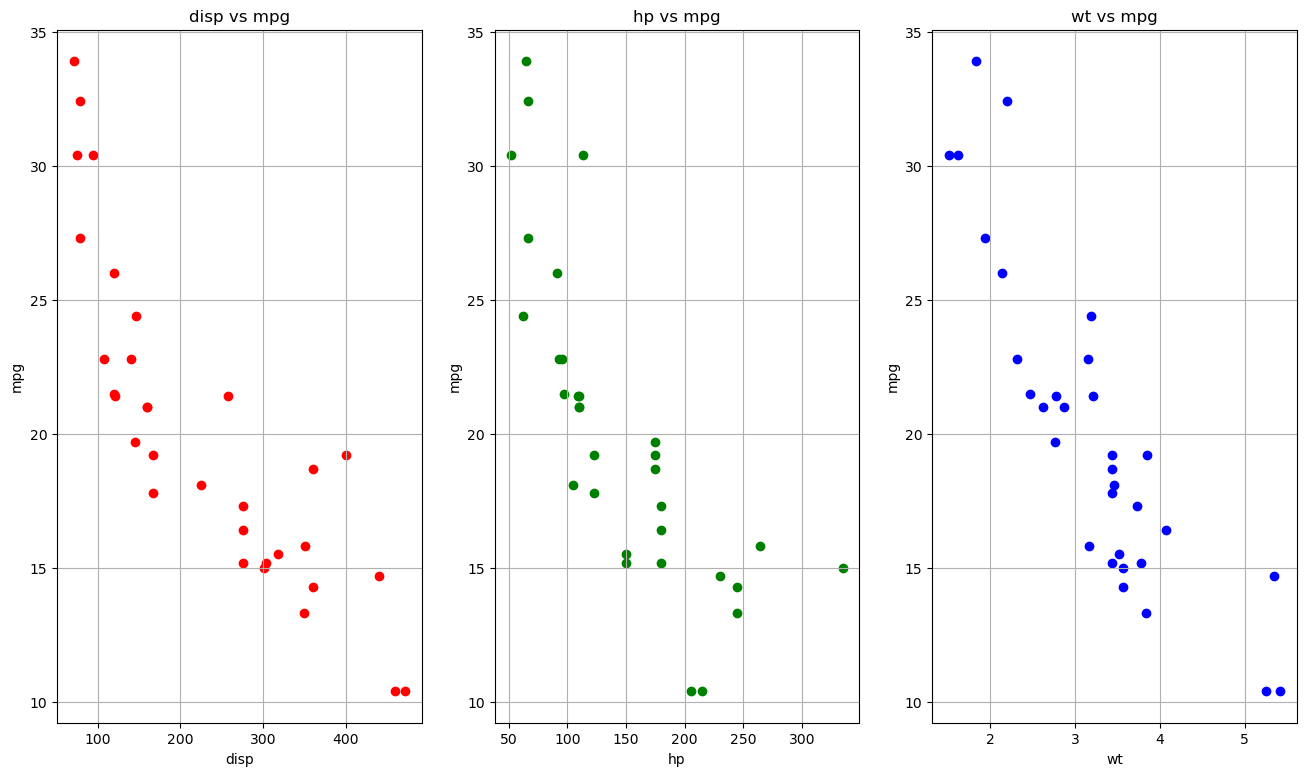

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.title("disp vs mpg")
plt.xlabel('disp')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['disp'], y, color = 'red')

plt.subplot(1,3,2)
plt.title("hp vs mpg")
plt.xlabel('hp')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['hp'], y, color = 'green')

plt.subplot(1,3,3)
plt.title("wt vs mpg")
plt.xlabel('wt')
plt.ylabel('mpg')
plt.grid()
plt.scatter(x['wt'], y, color = 'blue')


#### Adaboost the regression

In [16]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
reg_adb = AdaBoostRegressor(regression, n_estimators=10, random_state=0)

In [21]:
reg_adb.fit(x, y)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=10, random_state=0)

In [22]:
reg_adb.score(x, y)

0.8273159099884393

In [29]:
reg_adb.estimator_weights_

array([0.55965117, 0.71281533, 0.49807618, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])